In [62]:
from qconsensus import q_consensus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from Bio import SeqIO
from tqdm import tqdm

In [5]:
supv5_entries = 11739524//4
Q_sample = np.zeros(supv5_entries)
for i, record in tqdm(enumerate(SeqIO.parse('data/calls_2024-11-10_T06-11-48.fastq', format='fastq')), total=supv5_entries):
    Q_sample[i] = -10*np.log10(np.mean(np.power(10, -np.array(record.letter_annotations["phred_quality"])/10)))

100%|██████████| 2934881/2934881 [02:06<00:00, 23220.54it/s]


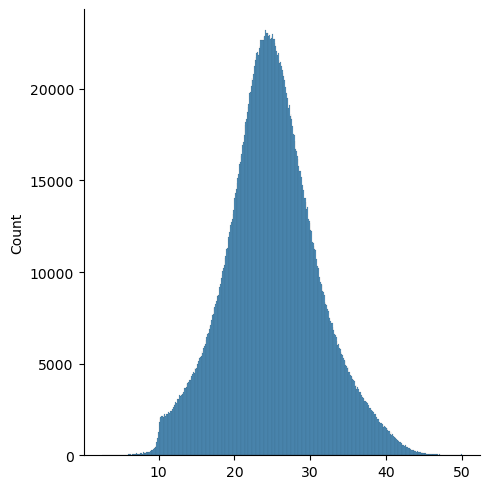

In [7]:
sns.displot(Q_sample)

/Users/frederikknudsen/Local/q-consensus/qconsensus.py:72: RuntimeWarning: divide by zero encountered in log10
  q = np.round(-10 * np.log10(1 - p), 0)


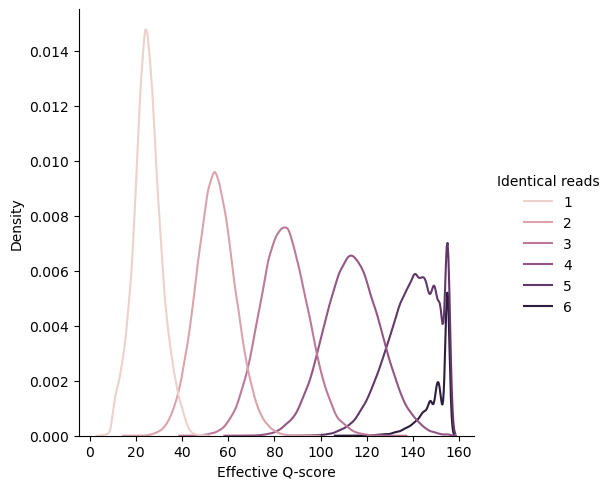

In [66]:
samples = 100000
depth = np.arange(1,7)

Q_cons = []
for d in depth:
    Q = np.random.choice(Q_sample, [samples, d])
    R = np.repeat(np.repeat('A', samples)[:,None], d, axis=1)
    s, q = q_consensus(R, Q)
    Q_cons.append(q)

Q_cons = np.array(Q_cons)
Q_cons = pd.DataFrame(data=Q_cons.T, columns=depth).melt(var_name='Identical reads', value_name='Effective Q-score')
Q_cons = Q_cons[Q_cons != np.inf].dropna()

sns.displot(Q_cons,
            x='Effective Q-score',
            hue='Identical reads',
            kind='kde')